In [1]:
# python日期和时间工具

In [3]:
# 1,原生的日期和时间工具 datetime与dateutil
from datetime import datetime
datetime(year=2020,month=2,day=6)

datetime.datetime(2020, 2, 6, 0, 0)

In [4]:
# 或者利用dateutil对字符串格式日期进行解析
from dateutil import parser
date = parser.parse('6th of Feb, 2020')
date

datetime.datetime(2020, 2, 6, 0, 0)

In [5]:
# 拿到了datetime对象就可以进行许多操作了
date.strftime('%A')      # 打印星期几

'Thursday'

In [6]:
# 2,NumPy的datetime64类型
import numpy as np
date = np.array('2020-02-06',dtype=np.datetime64)
date

array('2020-02-06', dtype='datetime64[D]')

In [7]:
# 这个日期格式可以快速向量化，自动判断所需要的时间单位
date + np.arange(12)

array(['2020-02-06', '2020-02-07', '2020-02-08', '2020-02-09',
       '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13',
       '2020-02-14', '2020-02-15', '2020-02-16', '2020-02-17'],
      dtype='datetime64[D]')

In [8]:
np.datetime64('2020-02-06 22:42:59.50','ns')

numpy.datetime64('2020-02-06T22:42:59.500000000')

In [10]:
# 3,Pandas的日期和时间工具
import pandas as pd
date = pd.to_datetime('6th of Feb, 2020')
date

Timestamp('2020-02-06 00:00:00')

In [11]:
date.strftime('%A')

'Thursday'

In [12]:
date + pd.to_timedelta(np.arange(12),'D')

DatetimeIndex(['2020-02-06', '2020-02-07', '2020-02-08', '2020-02-09',
               '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13',
               '2020-02-14', '2020-02-15', '2020-02-16', '2020-02-17'],
              dtype='datetime64[ns]', freq=None)

In [13]:
# ------ 详细介绍Pandas时间处理 ---------

In [14]:
# Pandas时间序列工具非常适合带时间戳的索引数据
index = pd.DatetimeIndex(['2014-07-04','2014-08-04','2015-07-04','2015-08-04'])
data = pd.Series([0,1,2,3],index=index)        # 带时间索引的Series对象
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [15]:
data['2014-07-04':'2015-07-04']     # 日期切片

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [16]:
data['2015']      # 直接年份切片取当年的数据

2015-07-04    2
2015-08-04    3
dtype: int64

In [28]:
dates = pd.to_datetime([datetime(2015,7,3),'4th of Jan, 2019','2017-July-6','07-07-2015','20160215'])    # 多种方式解析
dates

DatetimeIndex(['2015-07-03', '2019-01-04', '2017-07-06', '2015-07-07',
               '2016-02-15'],
              dtype='datetime64[ns]', freq=None)

In [29]:
dates.to_period('D')
dates

DatetimeIndex(['2015-07-03', '2019-01-04', '2017-07-06', '2015-07-07',
               '2016-02-15'],
              dtype='datetime64[ns]', freq=None)

In [30]:
dates - dates[0]

TimedeltaIndex(['0 days', '1281 days', '734 days', '4 days', '227 days'], dtype='timedelta64[ns]', freq=None)

In [31]:
# 有规律的时间序列 pd.date_range()
pd.date_range('2015-07-03','2015-07-10')    # 开始日期，结束日期，频率代码（默认是D,天数）

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [32]:
pd.date_range('2020-02-06',periods=8,freq='H')

DatetimeIndex(['2020-02-06 00:00:00', '2020-02-06 01:00:00',
               '2020-02-06 02:00:00', '2020-02-06 03:00:00',
               '2020-02-06 04:00:00', '2020-02-06 05:00:00',
               '2020-02-06 06:00:00', '2020-02-06 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [33]:
# 时间频率代码的组合
pd.timedelta_range(0,periods=9,freq='2H30T')

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

In [34]:
# 工作日偏移序列
from pandas.tseries.offsets import BDay
pd.date_range('2020-02-06',periods=7,freq=BDay())

DatetimeIndex(['2020-02-06', '2020-02-07', '2020-02-10', '2020-02-11',
               '2020-02-12', '2020-02-13', '2020-02-14'],
              dtype='datetime64[ns]', freq='B')

In [1]:
# ------- 案例：美国西雅图自行车统计数据的可视化 ----

In [3]:
import numpy as np
import pandas as pd
import seaborn
from matplotlib.pylab import plt
data = pd.read_csv('FremontBridge.csv',index_col='Date',parse_dates=True)

In [4]:
data.head()

,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


In [5]:
# 简化数据集
data.columns = ['West','East']
data['Total'] = data['West']+data['East']
data.head()

,West,East,Total
Date,,,
2012-10-03 00:00:00,4.0,9.0,13.0
2012-10-03 01:00:00,4.0,6.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,2.0,3.0,5.0
2012-10-03 04:00:00,6.0,1.0,7.0


In [6]:
data.dropna().describe()

,West,East,Total
count,26225.000000,26225.000000,26225.000000
mean,58.310658,53.605682,111.916339
std,75.671427,76.128342,137.383976
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,17.000000
50%,33.000000,28.000000,64.000000
75%,77.000000,67.000000,149.000000
max,781.000000,667.000000,1050.000000


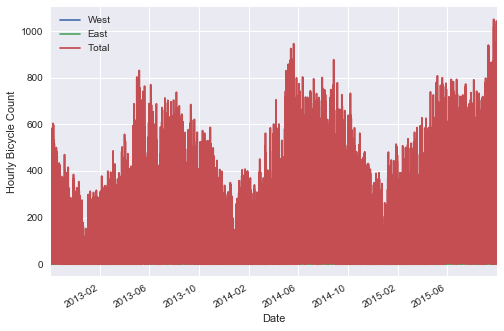

In [7]:
# （1）数据可视化
%matplotlib inline
seaborn.set()
data.plot()
plt.ylabel("Hourly Bicycle Count")

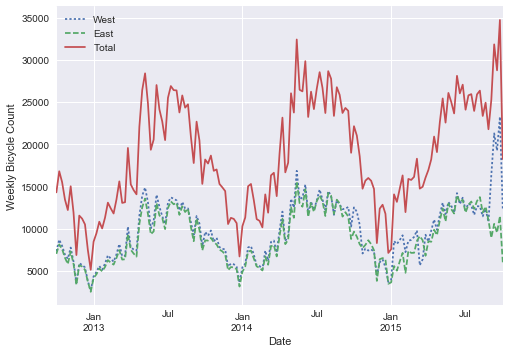

In [8]:
# 样本数据过多，于是将颗粒度调大，以周来累计
weekly = data.resample('W').sum()
weekly.plot(style=[':','--','-'])
plt.ylabel('Weekly Bicycle Count')

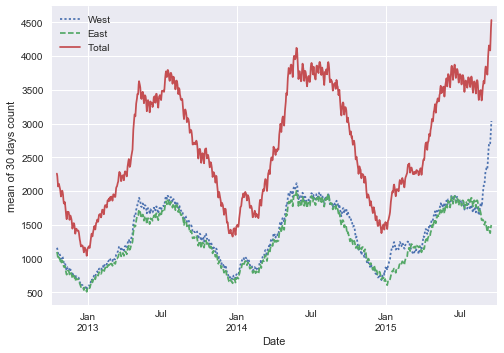

In [14]:
# 使用pd.rolling_mean() 函数 求移动平均值
daily = data.resample('D').sum()
daily.rolling(30,center=True).mean().plot(style=[':','--','-'])
plt.ylabel('mean of 30 days count')

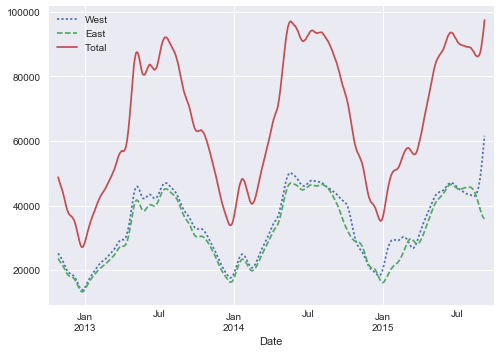

In [18]:
# 获得更加平滑的图形 - 高斯分布时间窗口
daily.rolling(50,center=True,win_type='gaussian').sum(std=10).plot(style=[':','--','-'])

In [20]:
# (2) 深入挖掘数据
# 单日内小时均值流量
data.index.time

array([datetime.time(0, 0), datetime.time(1, 0), datetime.time(2, 0), ...,
       datetime.time(21, 0), datetime.time(22, 0), datetime.time(23, 0)],
      dtype=object)

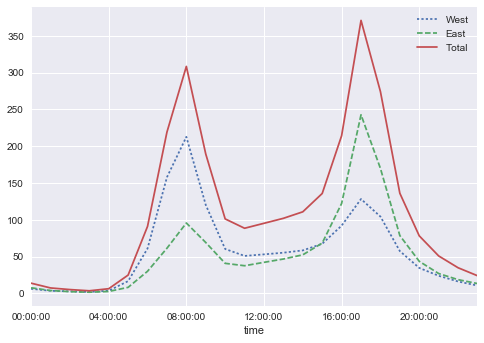

In [22]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4*60*60*np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':','--','-'])
# 可以发现，单日小时均值呈现十分明显的双峰分布特征

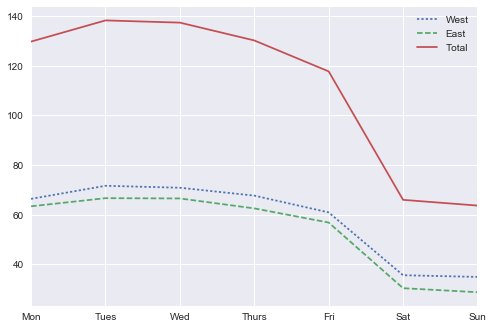

In [23]:
# 周内每天的流量均值
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index=['Mon','Tues','Wed','Thurs','Fri','Sat','Sun']
by_weekday.plot(style=[':','--','-'])
# 可以看出，工作日与周末的自行车流量差非常显著

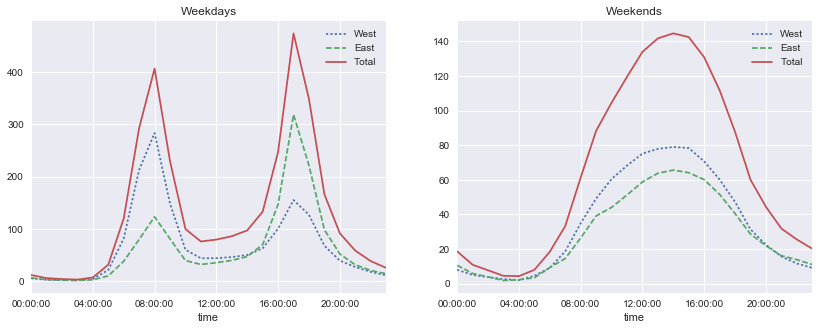

In [24]:
# 工作日与双休日每小时的均值流量
weekend = np.where(data.index.weekday<5,'Weekday','Weekend')
by_time = data.groupby([weekend,data.index.time]).mean()
fig, ax = plt.subplots(1,2,figsize=(14,5))
by_time.ix['Weekday'].plot(ax=ax[0],title='Weekdays',xticks=hourly_ticks,style=[':','--','-'])
by_time.ix['Weekend'].plot(ax=ax[1],title='Weekends',xticks=hourly_ticks,style=[':','--','-'])